## Searching algorithms

<ol>
<li>Implement a basic structure for a Binary Search Tree (BST).</li>
<li>Populate the BST with 24 random elements.</li>
<li>Implement a search function to check if a particular number exists in the BST.</li>
<li>Visualize the BST.</li>
</ol>

In [2]:
import random

# Step 1: Implement the BST

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.key = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    # Insert a new node with the given key
    def insert(self, key):
        # If the tree is empty, return a new node
        if self.root is None:
            self.root = Node(key)
        else:
            # Otherwise, recur down the tree
            self._insert_recursively(self.root, key)

    def _insert_recursively(self, current_node, key):
        # If the tree is empty, return a new node
        if current_node is None:
            return Node(key)

        # Otherwise, recur down the tree
        if key < current_node.key:
            current_node.left = self._insert_recursively(current_node.left, key)
        else:
            current_node.right = self._insert_recursively(current_node.right, key)

        return current_node

# Step 2: Populate the BST with 24 random elements

bst = BinarySearchTree()
elements = random.sample(range(1, 100), 24)

for el in elements:
    bst.insert(el)

elements

[13,
 15,
 74,
 93,
 8,
 46,
 33,
 63,
 79,
 49,
 40,
 21,
 11,
 83,
 89,
 70,
 85,
 19,
 7,
 58,
 59,
 77,
 22,
 56]

In [3]:
# Step 3: Implement the Search Function

def search_in_bst(node, key):
    # If the current node is null or the key is present at the root, return the node
    if node is None or node.key == key:
        return node

    # If the key is greater than the root's key, recur on the right subtree
    if key > node.key:
        return search_in_bst(node.right, key)
    
    # If the key is smaller than the root's key, recur on the left subtree
    return search_in_bst(node.left, key)

# Test the search function
test_key = elements[23]
result_node = search_in_bst(bst.root, test_key)
print(test_key)
bool(result_node)  # This will return True if the node is found, otherwise False

56


True

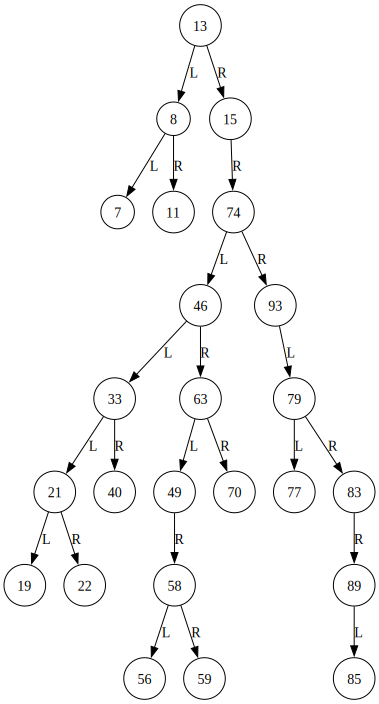

In [4]:
from graphviz import Digraph

def visualize_tree(node, graph=None):
    if graph is None:
        graph = Digraph('BST', node_attr={'shape': 'circle', 'height': '.1'})
        
    if node.left:
        graph.edge(str(node.key), str(node.left.key), color = "black", label = "L")
        visualize_tree(node.left, graph)
    if node.right:
        graph.edge(str(node.key), str(node.right.key), color = "black", label = "R")
        visualize_tree(node.right, graph)
    return graph

tree_graph = visualize_tree(bst.root)
tree_graph

In [5]:
def inorder_traversal(node):
    """Perform in-order traversal and return the nodes in a list."""
    return inorder_traversal(node.left) + [node.key] + inorder_traversal(node.right) if node else []

sorted_elements = inorder_traversal(bst.root)
sorted_elements

[7,
 8,
 11,
 13,
 15,
 19,
 21,
 22,
 33,
 40,
 46,
 49,
 56,
 58,
 59,
 63,
 70,
 74,
 77,
 79,
 83,
 85,
 89,
 93]

In [6]:
def preorder_traversal(node):
    """Perform pre-order traversal and return the nodes in a list."""
    return [node.key] + preorder_traversal(node.left) + preorder_traversal(node.right) if node else []

preorder_elements = preorder_traversal(bst.root)
preorder_elements

[13,
 8,
 7,
 11,
 15,
 74,
 46,
 33,
 21,
 19,
 22,
 40,
 63,
 49,
 58,
 56,
 59,
 70,
 93,
 79,
 77,
 83,
 89,
 85]

In [7]:
def postorder_traversal(node):
    """Perform post-order traversal and return the nodes in a list."""
    return postorder_traversal(node.left) + postorder_traversal(node.right) + [node.key] if node else []

postorder_elements = postorder_traversal(bst.root)
postorder_elements

[7,
 11,
 8,
 19,
 22,
 21,
 40,
 33,
 56,
 59,
 58,
 49,
 70,
 63,
 46,
 77,
 85,
 89,
 83,
 79,
 93,
 74,
 15,
 13]

In [132]:
# Reconstructing the BST from the previous steps
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.key = key

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursively(self.root, key)

    def _insert_recursively(self, current_node, key):
        if current_node is None:
            return Node(key)

        if key < current_node.key:
            current_node.left = self._insert_recursively(current_node.left, key)
        else:
            current_node.right = self._insert_recursively(current_node.right, key)

        return current_node

# Populate the BST with the previously generated elements
bst = BinarySearchTree()
for el in sorted_elements:
    bst.insert(el)

# Perform in-order traversal to get the sorted elements
def inorder_traversal(node):
    return inorder_traversal(node.left) + [node.key] + inorder_traversal(node.right) if node else []

sorted_elements = inorder_traversal(bst.root)
sorted_elements

[4,
 5,
 13,
 16,
 17,
 23,
 29,
 30,
 33,
 39,
 42,
 43,
 53,
 64,
 65,
 66,
 72,
 78,
 82,
 84,
 86,
 91,
 93,
 99]

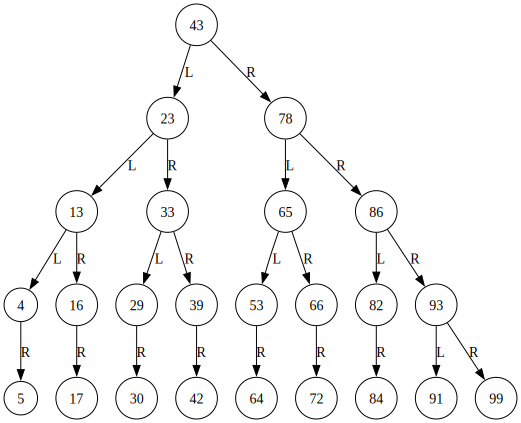

In [133]:
def sorted_array_to_bst(start, end, sorted_elements):
    """Recursively construct a balanced BST from a sorted array."""
    # Base condition
    if start > end:
        return None

    # Find the middle of the array and make it the root
    mid = (start + end) // 2
    node = Node(sorted_elements[mid])

    # Recursively construct the left and right subtrees
    node.left = sorted_array_to_bst(start, mid - 1, sorted_elements)
    node.right = sorted_array_to_bst(mid + 1, end, sorted_elements)

    return node

# Constructing the balanced BST
balanced_bst = BinarySearchTree()
balanced_bst.root = sorted_array_to_bst(0, len(sorted_elements) - 1, sorted_elements)

# Visualizing the balanced BST
balanced_tree_graph = visualize_tree(balanced_bst.root)
balanced_tree_graph


In [134]:
# Test the search function
test_key = elements[23]
result_node = search_in_bst(bst.root, test_key)
print(test_key)
bool(result_node)  # This will return True if the node is found, otherwise False

29


True

In [135]:
def search_in_bst_with_count(node, key):
    """Search the BST and return the number of comparisons made."""
    if (node is None) or (node.key == key):
        print("=", node.key, key)
        return (node, 1)

    if key > node.key:
        print("R", node.key, key)
        found_node, count = search_in_bst_with_count(node.right, key)
    else:
        print("L", node.key, key)
        found_node, count = search_in_bst_with_count(node.left, key)

    return (found_node, count + 1)

# Test the modified search function
test_key = elements[23]
result_node, comparisons = search_in_bst_with_count(balanced_bst.root, test_key)
print(test_key, comparisons)
bool(result_node)  # This will return True if the node is found, otherwise False

L 43 29
R 23 29
L 33 29
= 29 29
29 4


True

# AVL trees

In [111]:
from graphviz import Digraph

def visualize_avl_tree(node, graph=None):
    if graph is None:
        graph = Digraph('BST', node_attr={'shape': 'circle', 'height': '.1'})
        
    if node.left:
        # graph.add_edge(node, node.left, label='L')
        graph.edge(str(node.key), str(node.left.key), color = "black", label = "L")
        visualize_avl_tree(node.left, graph)
    if node.right:
        graph.edge(str(node.key), str(node.right.key), color = "black", label = "R")
        visualize_avl_tree(node.right, graph)
    return graph

In [143]:
import matplotlib.pyplot as plt

class AVLNode:
    def __init__(self, key, height=1, left=None, right=None):
        self.key = key
        self.height = height
        self.left = left
        self.right = right


class AVLTree:
    def __init__(self):
        self.root = None

    def _height(self, node):
        if node is None:
            return 0
        return node.height

    def _update_height(self, node):
        if node:
            node.height = 1 + max(self._height(node.left), self._height(node.right))

    def _balance_factor(self, node):
        if not node:
            return 0
        return self._height(node.left) - self._height(node.right)

    def _left_rotate(self, z):
        y = z.right
        T2 = y.left

        # Perform rotation
        y.left = z
        z.right = T2

        # Update heights
        self._update_height(z)
        self._update_height(y)

        return y

    def _right_rotate(self, z):
        y = z.left
        T3 = y.right

        # Perform rotation
        y.right = z
        z.left = T3

        # Update heights
        self._update_height(z)
        self._update_height(y)

        return y

    def _insert(self, root, key):
        if not root:
            return AVLNode(key)

        if key < root.key:
            root.left = self._insert(root.left, key)
        else:
            root.right = self._insert(root.right, key)

        self._update_height(root)
        balance = self._balance_factor(root)

        # Left heavy
        if balance > 1:
            if key < root.left.key:
                return self._right_rotate(root)
            else:
                root.left = self._left_rotate(root.left)
                return self._right_rotate(root)

        # Right heavy
        if balance < -1:
            if key > root.right.key:
                return self._left_rotate(root)
            else:
                root.right = self._right_rotate(root.right)
                return self._left_rotate(root)

        return root

    def insert(self, key):
        if not self.root:
            self.root = AVLNode(key)
        else:
            self.root = self._insert(self.root, key)

    def _search(self, root, key):
        if not root:
            return False
        if key == root.key:
            return True
        elif key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)

    def search(self, key):
        return self._search(self.root, key)



In [144]:
# Create an AVL Tree and insert some integers
avl_tree = AVLTree()
integers = [
    40, 20, 10, 25, 30, 22, 50, 45, 55, 48,
    49, 15, 27, 29, 28, 5, 9, 7, 6, 8,
    12, 14, 11, 13, 37, 36, 39, 35, 34, 38
]
for num in integers:
    avl_tree.insert(num)


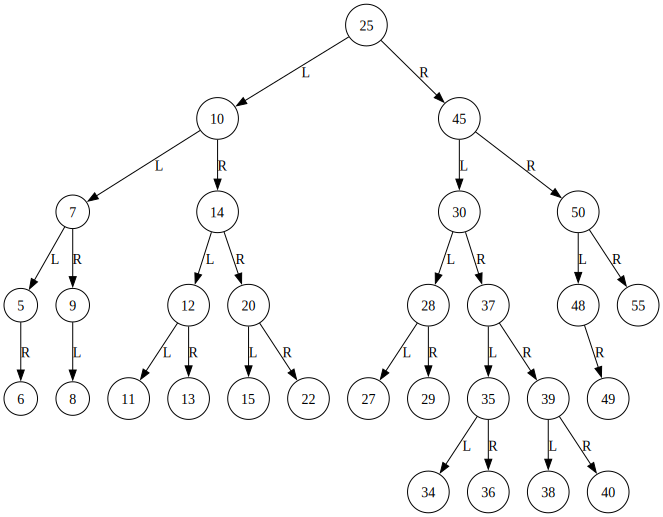

In [145]:
# Visualize the AVL Tree
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph


In [146]:
# Search the AVL Tree for 5 example integers
search_examples = [10, 33, 55, 28, 60]
search_results = [(example, avl_tree.search(example)) for example in search_examples]
search_results

[(10, True), (33, False), (55, True), (28, True), (60, False)]

Slow construction of AVL tree

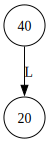

In [147]:
# Create an AVL Tree and insert integers one by one
avl_tree = AVLTree()

avl_tree.insert(40)
avl_tree.insert(20)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

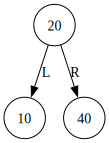

In [148]:
avl_tree.insert(10)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

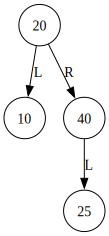

In [149]:
avl_tree.insert(25)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

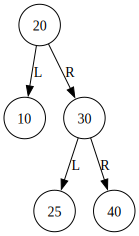

In [150]:
avl_tree.insert(30)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

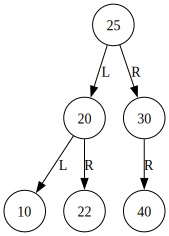

In [151]:
avl_tree.insert(22)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

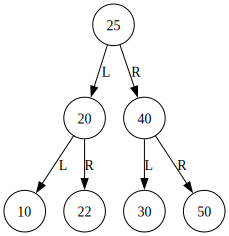

In [152]:
avl_tree.insert(50)
avl_tree_graph = visualize_tree(avl_tree.root)
avl_tree_graph

# Hash table example

In [153]:
import json

class HashTable:
    def __init__(self, size=100):
        # Initializing the table size and the table (as a list of that size)
        self.size = size
        self.table = [None] * size

    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)
        
    def hash_function(self, key):
        # Simple hash function using modulo operation
        return key % self.size
    
    def insert(self, key):
        # Insert the key into the hash table
        index = self.hash_function(key)
        if not self.table[index]:
            self.table[index] = [key]
        else:
            self.table[index].append(key)
    
    def search(self, key):
        # Search for the key in the hash table
        index = self.hash_function(key)
        if self.table[index] and key in self.table[index]:
            return True
        return False

In [154]:
# Create a hash table and insert some integers
hash_table = HashTable()
numbers = [15, 67, 89, 120, 256, 20, 220, 2, 12, 102, 202, 1, 99]
for num in numbers:
    hash_table.insert(num)

print(hash_table.toJSON())

{
    "size": 100,
    "table": [
        null,
        [
            1
        ],
        [
            2,
            102,
            202
        ],
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        [
            12
        ],
        null,
        null,
        [
            15
        ],
        null,
        null,
        null,
        null,
        [
            120,
            20,
            220
        ],
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
      

In [155]:
# Search the hash table for 5 examples
search_results = []
examples = [15, 67, 25, 256, 500]
for example in examples:
    search_results.append((example, hash_table.search(example)))

search_results

[(15, True), (67, True), (25, False), (256, True), (500, False)]

## String hash table

In [156]:
class StringHashTable:
    def __init__(self, size=100):
        # Initializing the table size and the table (as a list of that size)
        self.size = size
        self.table = [None] * size
        
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)
        
    def hash_function(self, key):
        # Hash function for strings
        return sum([ord(char) * idx for idx, char in enumerate(key)]) % self.size
    
    def insert(self, key):
        # Insert the key into the hash table
        index = self.hash_function(key)
        if not self.table[index]:
            self.table[index] = [key]
        else:
            self.table[index].append(key)
    
    def search(self, key):
        # Search for the key in the hash table
        index = self.hash_function(key)
        if self.table[index] and key in self.table[index]:
            return True
        return False



In [157]:
# Create a hash table and insert some strings
string_hash_table = StringHashTable()
strings = ["apple", "banana", "cherry", "date", "fig"]
for s in strings:
    string_hash_table.insert(s)

print(string_hash_table.toJSON())

{
    "size": 100,
    "table": [
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        [
            "cherry"
        ],
        null,
        [
            "fig"
        ],
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        [
            "date"
        ],
        [
            "banana"
        ],
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
        null,
     

In [158]:
# Search the hash table for 5 example strings
string_search_results = []
string_examples = ["apple", "grape", "date", "orange", "cherry"]
for example in string_examples:
    string_search_results.append((example, string_hash_table.search(example)))

string_search_results


[('apple', True),
 ('grape', False),
 ('date', True),
 ('orange', False),
 ('cherry', True)]